# Flight cancellations

In [23]:
import pandas as pd  # Import Pandas for data manipulation and analysis

import warnings  # Import the warnings module to handle warnings
#warnings.filterwarnings("ignore")  # Filter and suppress warnings

# Import AutoViz_Class for automated visualization
from autoviz import AutoViz_Class

# Import load_dataset and create_report from dataprep for data loading and exploratory data analysis
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report

# Import SHAP for model interpretation
import shap

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import CatBoostClassifier and Pool for gradient boosting
from catboost import Pool, CatBoostClassifier

# Import CountVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Import RareLabelEncoder for encoding categorical variables with rare labels
from feature_engine.encoding import RareLabelEncoder

# Import metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score

# Import train_test_split for data splitting
from sklearn.model_selection import train_test_split

# Import Seaborn for advanced visualization
import seaborn as sns

# Import itertools for various iteration-related tasks
import itertools

# Import gc for garbage collection
import gc

# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)

In [2]:
# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)
# read the data
flights_data = pd.read_csv('/Users/megavishy/Downloads/flights_sample_3m.csv')

In [3]:
flights_data.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [4]:
flights_data.tail()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,NaN,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,NaN,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0.0,NaN,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,1728,1712.0,-16.0,0.0,NaN,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",730,727.0,-3.0,9.0,736.0,828.0,2.0,840,830.0,-10.0,0.0,NaN,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DOT_CODE,3000000.0,19976.294095,377.284619,19393.0,19790.0,19930.0,20368.0,20452.0
FL_NUMBER,3000000.0,2511.535519,1747.258040,1.0,1051.0,2152.0,3797.0,9562.0
CRS_DEP_TIME,3000000.0,1327.061984,485.878854,1.0,915.0,1320.0,1730.0,2359.0
DEP_TIME,2922385.0,1329.775913,499.310052,1.0,916.0,1323.0,1739.0,2400.0
DEP_DELAY,2922356.0,10.123326,49.251835,-90.0,-6.0,-2.0,6.0,2966.0
TAXI_OUT,2921194.0,16.643046,9.192901,1.0,11.0,14.0,19.0,184.0
WHEELS_OFF,2921194.0,1352.360989,500.872687,1.0,931.0,1336.0,1752.0,2400.0
WHEELS_ON,2920056.0,1462.499569,527.236818,1.0,1049.0,1501.0,1908.0,2400.0
TAXI_IN,2920056.0,7.678982,6.269639,1.0,4.0,6.0,9.0,249.0
CRS_ARR_TIME,3000000.0,1490.560665,511.547566,1.0,1107.0,1516.0,1919.0,2400.0


In [6]:
flights_data = flights_data.sample(10000)

In [7]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2070770 to 1914805
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FL_DATE                  10000 non-null  object 
 1   AIRLINE                  10000 non-null  object 
 2   AIRLINE_DOT              10000 non-null  object 
 3   AIRLINE_CODE             10000 non-null  object 
 4   DOT_CODE                 10000 non-null  int64  
 5   FL_NUMBER                10000 non-null  int64  
 6   ORIGIN                   10000 non-null  object 
 7   ORIGIN_CITY              10000 non-null  object 
 8   DEST                     10000 non-null  object 
 9   DEST_CITY                10000 non-null  object 
 10  CRS_DEP_TIME             10000 non-null  int64  
 11  DEP_TIME                 9750 non-null   float64
 12  DEP_DELAY                9750 non-null   float64
 13  TAXI_OUT                 9745 non-null   float64
 14  WHEELS_OFF         

In [8]:
flights_data.dtypes

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

In [9]:
flights_data.shape

(10000, 32)

In [10]:
flights_data.size

320000

In [11]:
flights_data.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

## Preprocessing

In [12]:
flights_data.duplicated().sum()

0

In [13]:
#for unique values
for columns in flights_data.columns:
    print(f"\n unique values in {columns}:")
    print(flights_data[columns].unique())


 unique values in FL_DATE:
['2021-04-13' '2023-05-01' '2020-03-12' ... '2021-03-16' '2020-05-26'
 '2019-02-14']

 unique values in AIRLINE:
['Spirit Air Lines' 'Southwest Airlines Co.' 'Delta Air Lines Inc.'
 'SkyWest Airlines Inc.' 'American Airlines Inc.' 'Hawaiian Airlines Inc.'
 'United Air Lines Inc.' 'ExpressJet Airlines LLC d/b/a aha!'
 'Horizon Air' 'Alaska Airlines Inc.' 'Endeavor Air Inc.'
 'Mesa Airlines Inc.' 'JetBlue Airways' 'PSA Airlines Inc.' 'Envoy Air'
 'Republic Airline' 'Allegiant Air' 'Frontier Airlines Inc.']

 unique values in AIRLINE_DOT:
['Spirit Air Lines: NK' 'Southwest Airlines Co.: WN'
 'Delta Air Lines Inc.: DL' 'SkyWest Airlines Inc.: OO'
 'American Airlines Inc.: AA' 'Hawaiian Airlines Inc.: HA'
 'United Air Lines Inc.: UA' 'ExpressJet Airlines LLC d/b/a aha!: EV'
 'Horizon Air: QX' 'Alaska Airlines Inc.: AS' 'Endeavor Air Inc.: 9E'
 'Mesa Airlines Inc.: YV' 'JetBlue Airways: B6' 'PSA Airlines Inc.: OH'
 'Envoy Air: MQ' 'Republic Airline: YX' 'Allegiant

In [14]:
#Check for null values and replace them

# First check overall nulls in dataset
print("\nTotal nulls in each column:")
print(flights_data.isnull().sum())

# Use for loop for quick null handling
for column in flights_data.columns:
    null_count = flights_data[column].isnull().sum()
    if null_count > 0:
        print(f"\n{column}:")
        print(f"Null count: {null_count}")
        print(f"Null percentage: {(null_count/len(flights_data))*100:.2f}%")
        
        # Create flag column
        flights_data[f"{column}_null_flag"] = flights_data[column].isnull()
        
        # Fill nulls based on data type
        if flights_data[column].dtype in ['int64', 'float64']:
            flights_data[column] = flights_data[column].fillna(flights_data[column].mean())
        else:
            flights_data[column] = flights_data[column].fillna(flights_data[column].mode()[0])


Total nulls in each column:
FL_DATE                       0
AIRLINE                       0
AIRLINE_DOT                   0
AIRLINE_CODE                  0
DOT_CODE                      0
FL_NUMBER                     0
ORIGIN                        0
ORIGIN_CITY                   0
DEST                          0
DEST_CITY                     0
CRS_DEP_TIME                  0
DEP_TIME                    250
DEP_DELAY                   250
TAXI_OUT                    255
WHEELS_OFF                  255
WHEELS_ON                   263
TAXI_IN                     263
CRS_ARR_TIME                  0
ARR_TIME                    263
ARR_DELAY                   290
CANCELLED                     0
CANCELLATION_CODE          9743
DIVERTED                      0
CRS_ELAPSED_TIME              0
ELAPSED_TIME                290
AIR_TIME                    290
DISTANCE                      0
DELAY_DUE_CARRIER          8164
DELAY_DUE_WEATHER          8164
DELAY_DUE_NAS              8164
DELAY_DUE_S

In [19]:
flights_data['AIRLINE']

2070770          Spirit Air Lines
1242400    Southwest Airlines Co.
1818629      Delta Air Lines Inc.
1339886     SkyWest Airlines Inc.
1083933    American Airlines Inc.
                    ...          
200215      SkyWest Airlines Inc.
934804       Delta Air Lines Inc.
2740320     SkyWest Airlines Inc.
2706604    Frontier Airlines Inc.
1914805           JetBlue Airways
Name: AIRLINE, Length: 10000, dtype: object

In [20]:
# Reset index entirely (creates a new 0-based index)
flights_data = flights_data.reset_index(drop=True)
# Now print the AIRLINE column
print(flights_data['AIRLINE'])

0             Spirit Air Lines
1       Southwest Airlines Co.
2         Delta Air Lines Inc.
3        SkyWest Airlines Inc.
4       American Airlines Inc.
                 ...          
9995     SkyWest Airlines Inc.
9996      Delta Air Lines Inc.
9997     SkyWest Airlines Inc.
9998    Frontier Airlines Inc.
9999           JetBlue Airways
Name: AIRLINE, Length: 10000, dtype: object


In [42]:
# First convert FL_DATE to datetime format
flights_data['FL_DATE'] = pd.to_datetime(flights_data['FL_DATE'])

## Visualization

In [26]:
%matplotlib inline

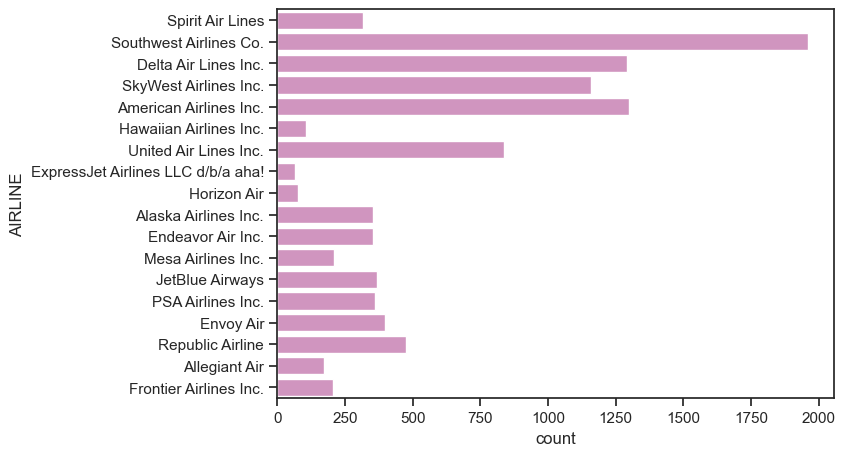

In [27]:
sns.countplot(flights_data['AIRLINE'])
plt.show()

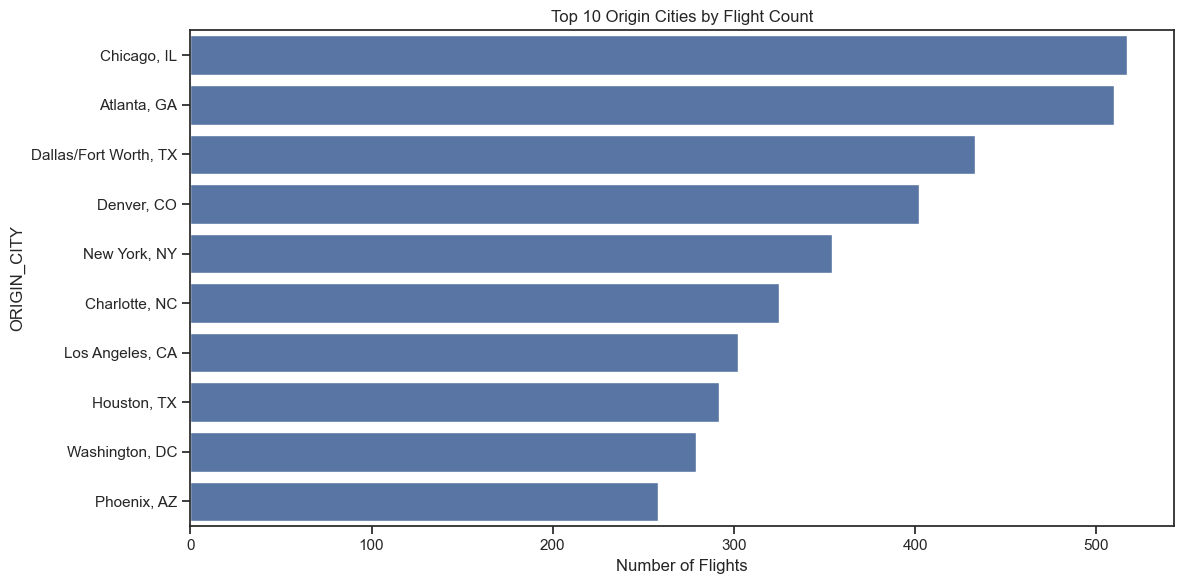

In [30]:
# Get the top 10 origin cities
top_10_cities = flights_data['ORIGIN_CITY'].value_counts().head(10)

# Plot them
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.title('Top 10 Origin Cities by Flight Count')
plt.xlabel('Number of Flights')
plt.tight_layout()
plt.show()

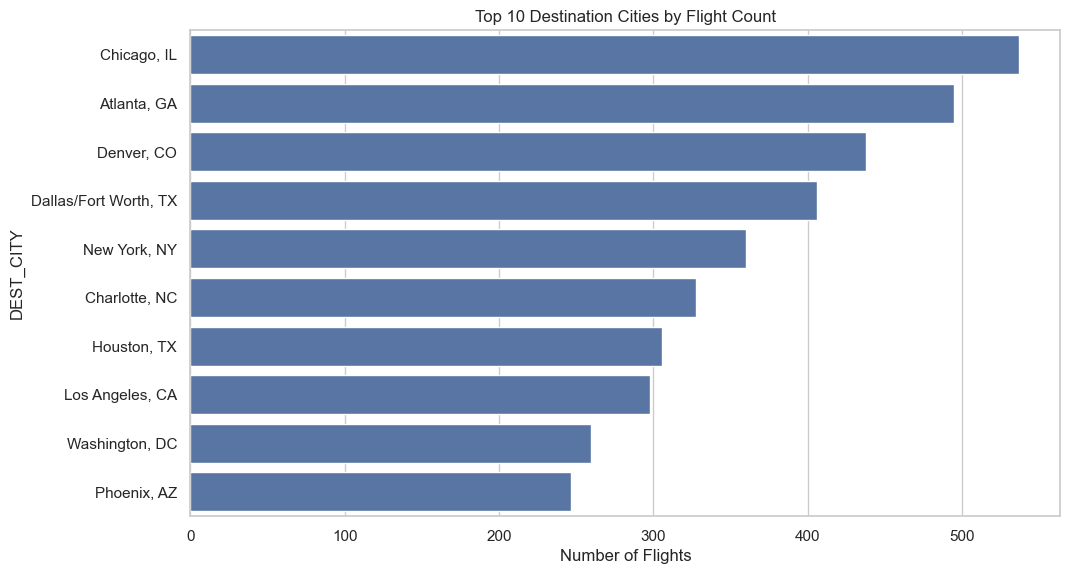

In [44]:
top_10_dest_cities = flights_data['DEST_CITY'].value_counts().head(10)
plt.figure(figsize =(10,6))
sns.barplot(x= top_10_dest_cities.values, y= top_10_dest_cities.index)
plt.title('Top 10 Destination Cities by Flight Count')
plt.xlabel('Number of Flights')
plt.show()

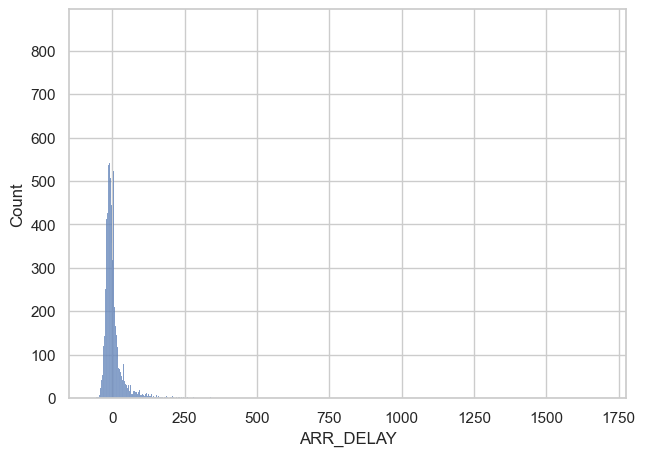

In [50]:
# histogram
sns.histplot(flights_data['ARR_DELAY'], kde = False)
plt.show()
# need to adjust the axis

<Figure size 1400x1000 with 0 Axes>

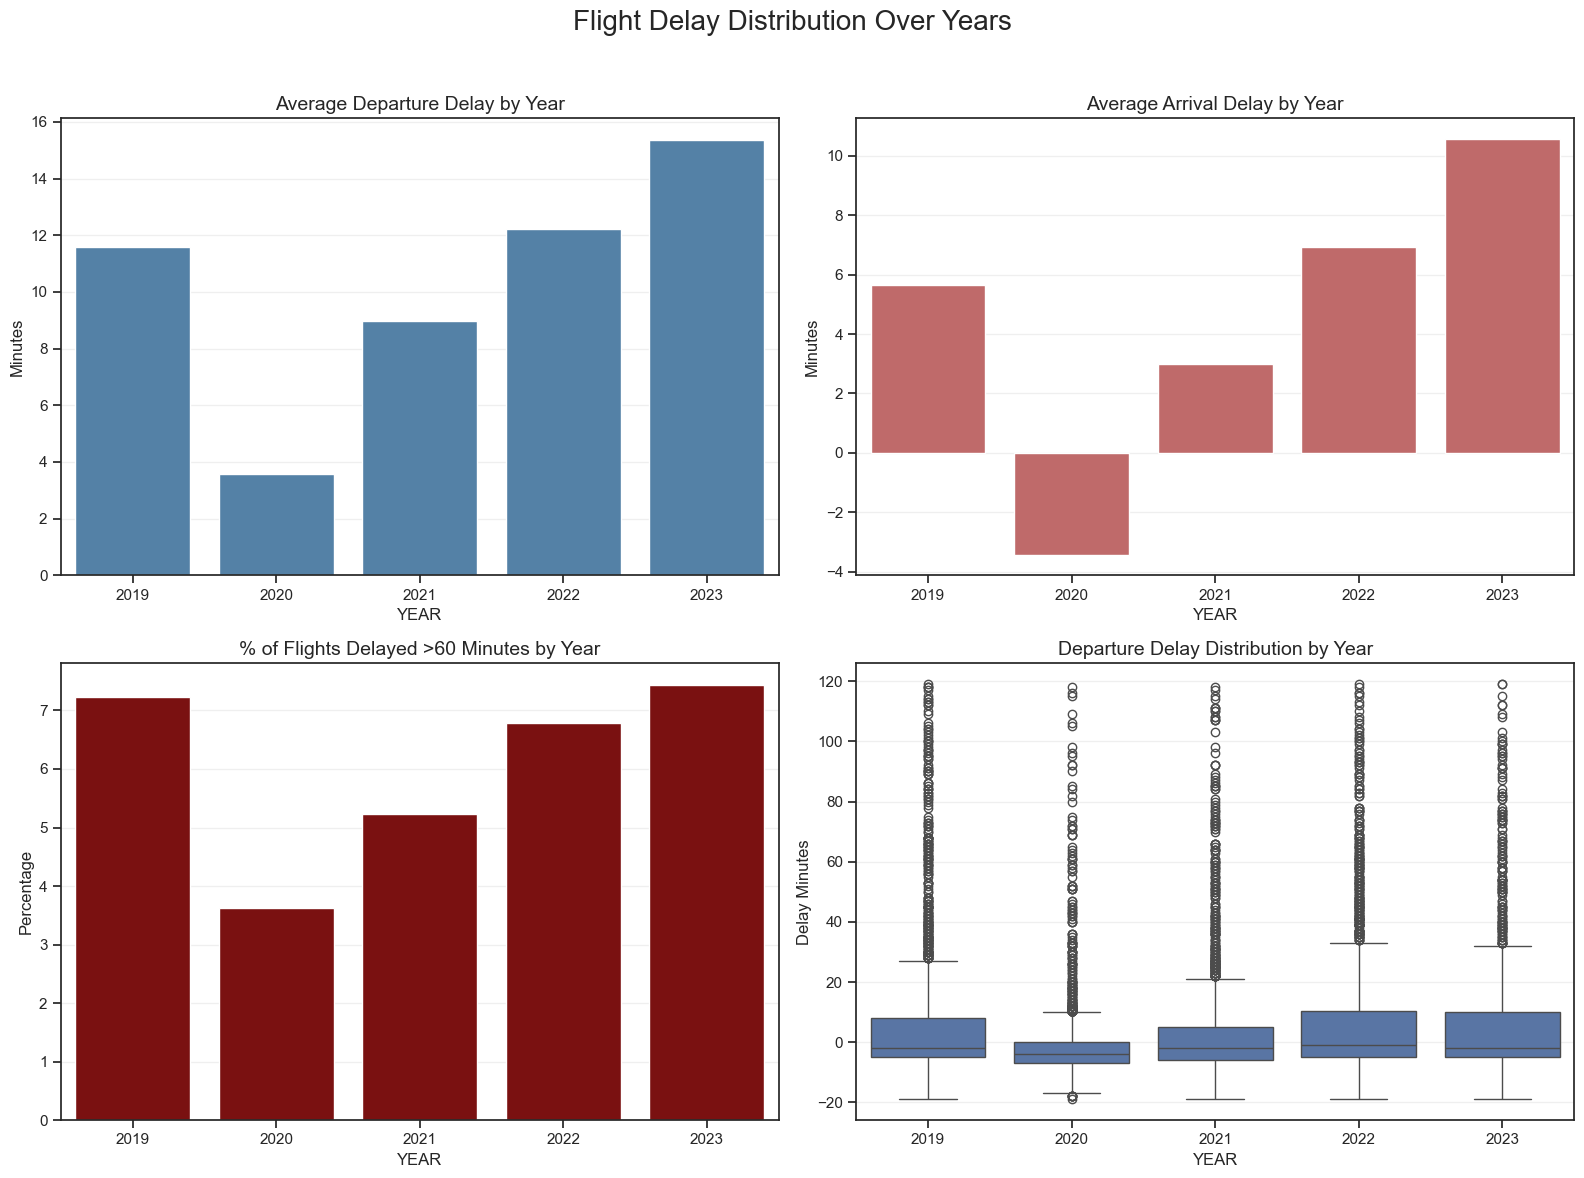

<Figure size 640x480 with 0 Axes>

In [37]:
# Extract year from flight date (assuming FL_DATE is already datetime)
flights_data['YEAR'] = flights_data['FL_DATE'].dt.year

# 1. YEARLY DELAY AVERAGES
plt.figure(figsize=(14, 10))

# Create a figure and axes FIRST
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average Departure Delay by Year
yearly_dep_delays = flights_data.groupby('YEAR')['DEP_DELAY'].mean().reset_index()
sns.barplot(x='YEAR', y='DEP_DELAY', data=yearly_dep_delays, ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Average Departure Delay by Year', fontsize=14)
axes[0, 0].set_ylabel('Minutes')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Average Arrival Delay by Year
yearly_arr_delays = flights_data.groupby('YEAR')['ARR_DELAY'].mean().reset_index()
sns.barplot(x='YEAR', y='ARR_DELAY', data=yearly_arr_delays, ax=axes[0, 1], color='indianred')
axes[0, 1].set_title('Average Arrival Delay by Year', fontsize=14)
axes[0, 1].set_ylabel('Minutes')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Percentage of Significantly Delayed Flights (>60 mins) by Year
flights_data['SIGNIFICANT_DELAY'] = flights_data['DEP_DELAY'] > 60
yearly_significant = flights_data.groupby('YEAR')['SIGNIFICANT_DELAY'].mean().reset_index()
yearly_significant['PERCENTAGE'] = yearly_significant['SIGNIFICANT_DELAY'] * 100
sns.barplot(x='YEAR', y='PERCENTAGE', data=yearly_significant, ax=axes[1, 0], color='darkred')
axes[1, 0].set_title('% of Flights Delayed >60 Minutes by Year', fontsize=14)
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Box Plot of Delay Distribution by Year
# Filter to avoid extreme outliers distorting the plot
filtered_for_boxplot = flights_data[(flights_data['DEP_DELAY'] > -20) & (flights_data['DEP_DELAY'] < 120)]
sns.boxplot(x='YEAR', y='DEP_DELAY', data=filtered_for_boxplot, ax=axes[1, 1])
axes[1, 1].set_title('Departure Delay Distribution by Year', fontsize=14)
axes[1, 1].set_ylabel('Delay Minutes')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Flight Delay Distribution Over Years', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ADDITIONAL VISUALIZATION: Heat map showing delay by month and year
# Create a pivot table of average delay by year and month
flights_data['MONTH'] = flights_data['FL_DATE'].dt.month
monthly_yearly_delay = flights_data.pivot_table(
    index='MONTH', 
    columns='YEAR', 
    values='DEP_DELAY', 
    aggfunc='mean'
)

plt.tight_layout()
plt.show()

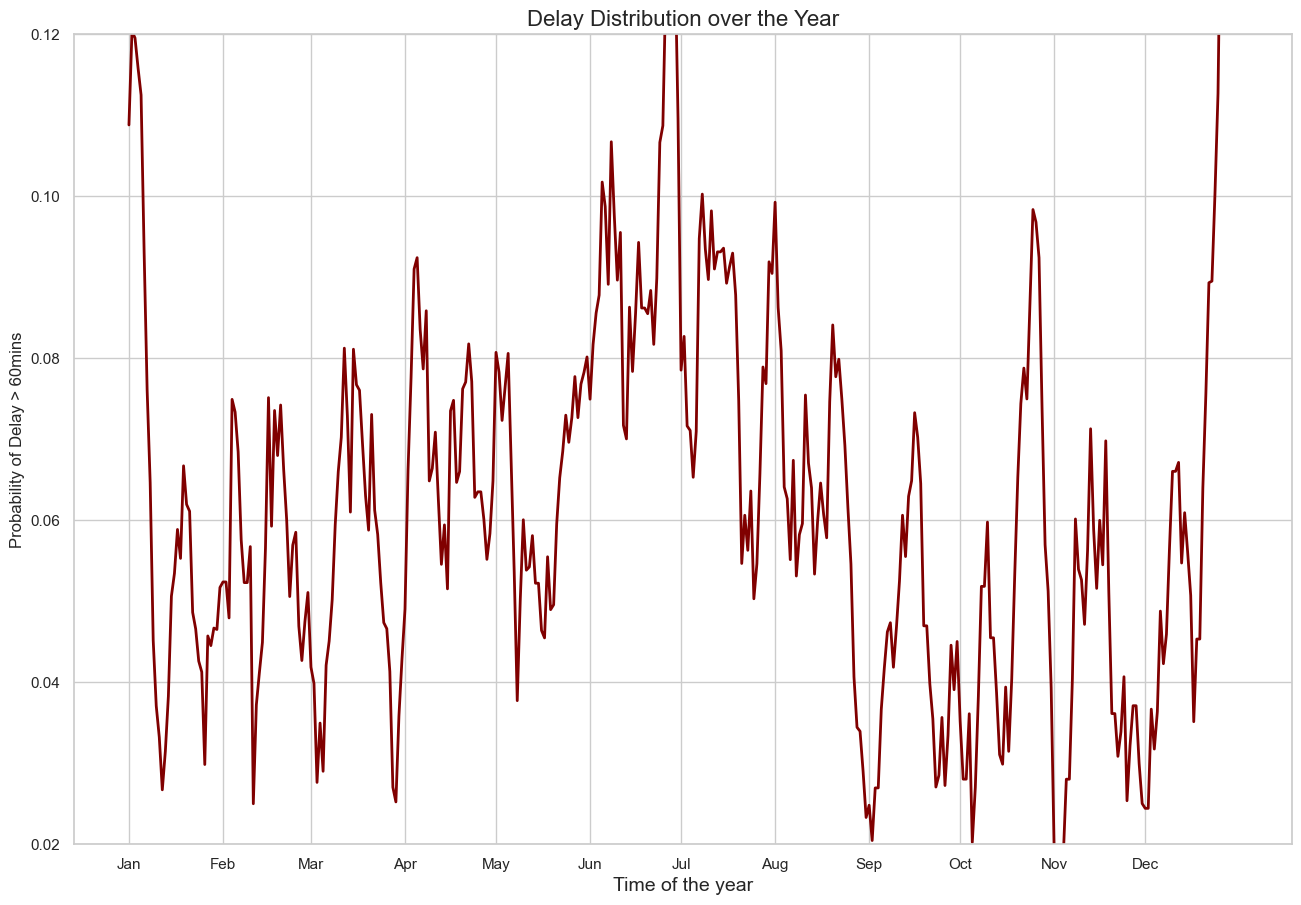

In [63]:

# Set the visual style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})


# Calculate daily delay probability with 7-day smoothing
delay_distribution = (
    flights_data
    .assign(
        flight_day=flights_data['FL_DATE'].dt.strftime('%m-%d'),
        is_delayed=flights_data['DEP_DELAY'] >= 60
    )
    .groupby('flight_day')['is_delayed']
    .mean()
    .rolling(7, min_periods=1, center=True)
    .mean()
)

# Create the plot matching the style shown
plt.figure(figsize=(14, 10))

# Plot the line with the specific maroon color
plt.plot(delay_distribution, color='maroon', linewidth=2)

# Set x-axis ticks to month names
month_positions = ['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', 
                  '07-01', '08-01', '09-01', '10-01', '11-01', '12-01']
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Make sure we only use month positions that exist in our data
valid_positions = [pos for pos in month_positions if pos in delay_distribution.index]
valid_labels = [month_labels[month_positions.index(pos)] for pos in valid_positions]

plt.xticks(valid_positions, valid_labels)

# Configure grid and labels to match the image
plt.grid(True)
plt.title('Delay Distribution over the Year', fontsize=16)
plt.xlabel('Time of the year', fontsize=14)
plt.ylabel('Probability of Delay > 60mins', fontsize=12)

# Set y-axis limits to match the image (approximately 0.03 to 0.10)
plt.ylim(0.02, 0.12)

plt.show()

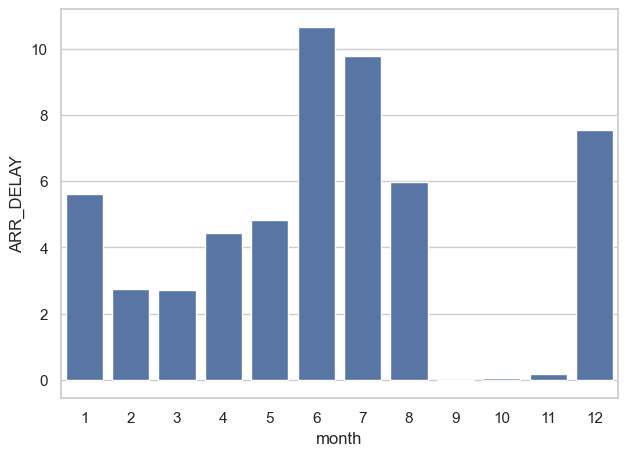

In [55]:
flights_data['month'] = flights_data['FL_DATE'].dt.month
flights_data['significant_delay'] = flights_data['ARR_DELAY'] > 60
flights_sign_delay = flights_data.groupby('month')['ARR_DELAY'].mean().reset_index()
sns.barplot(x = 'month', y = 'ARR_DELAY', data = flights_sign_delay)
plt.show()

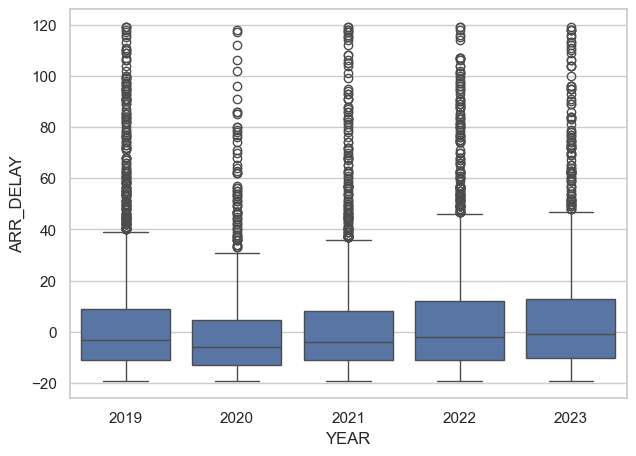

In [59]:
filtered_for_boxplot = flights_data[(flights_data['ARR_DELAY'] > -20) & (flights_data['ARR_DELAY'] < 120)]
sns.boxplot(x='YEAR', y='ARR_DELAY', data= filtered_for_boxplot)
plt.show()

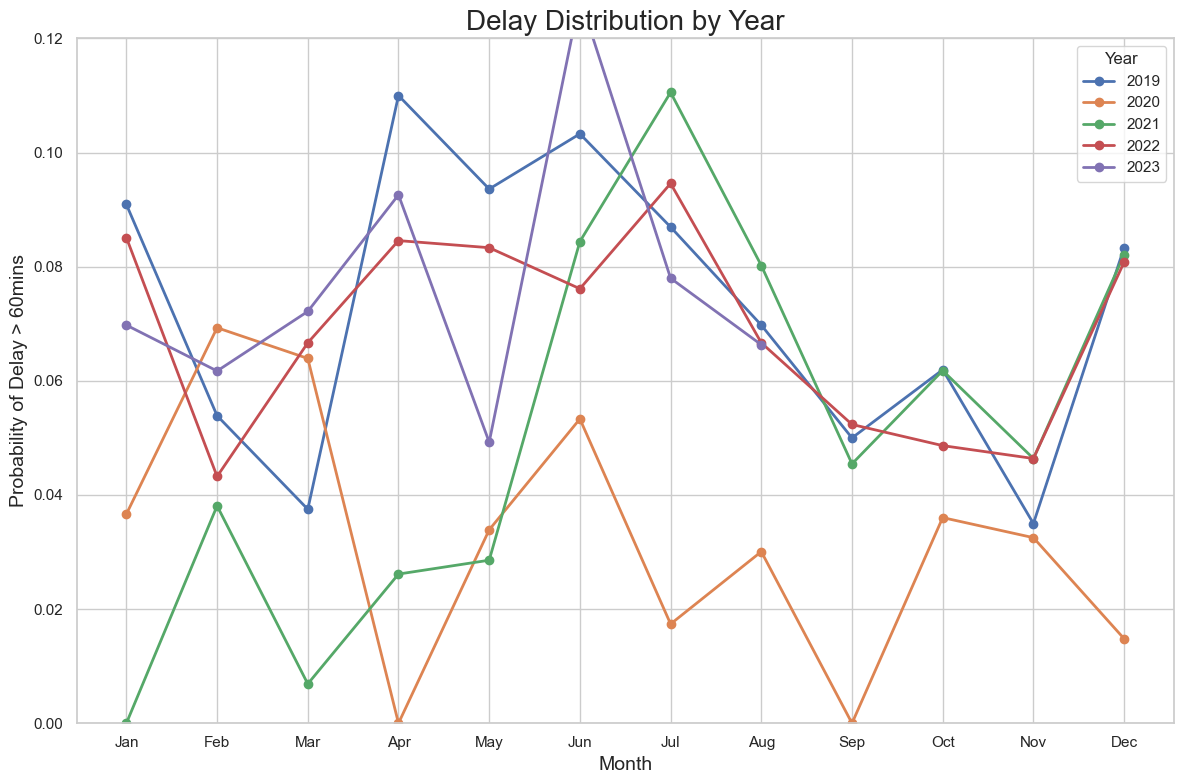

In [61]:
# Set the visual style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Make sure FL_DATE is datetime
flights_data['FL_DATE'] = pd.to_datetime(flights_data['FL_DATE'])

# Extract year and month from the date
flights_data['YEAR'] = flights_data['FL_DATE'].dt.year
flights_data['MONTH'] = flights_data['FL_DATE'].dt.month

# Calculate monthly delay probability by year
yearly_delay_distribution = (
    flights_data
    .assign(is_delayed=flights_data['DEP_DELAY'] >= 60)
    .groupby(['YEAR', 'MONTH'])['is_delayed']
    .mean()
    .reset_index()
    .pivot(index='MONTH', columns='YEAR', values='is_delayed')
)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each year as a separate line
for year in yearly_delay_distribution.columns:
    plt.plot(
        yearly_delay_distribution.index, 
        yearly_delay_distribution[year], 
        linewidth=2, 
        marker='o',
        label=str(year)
    )

# Configure the chart
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels)
plt.grid(True)
plt.title('Delay Distribution by Year', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Probability of Delay > 60mins', fontsize=14)
plt.legend(title='Year')
plt.ylim(0, 0.12)  # Adjust as needed based on your data

plt.tight_layout()
plt.show()


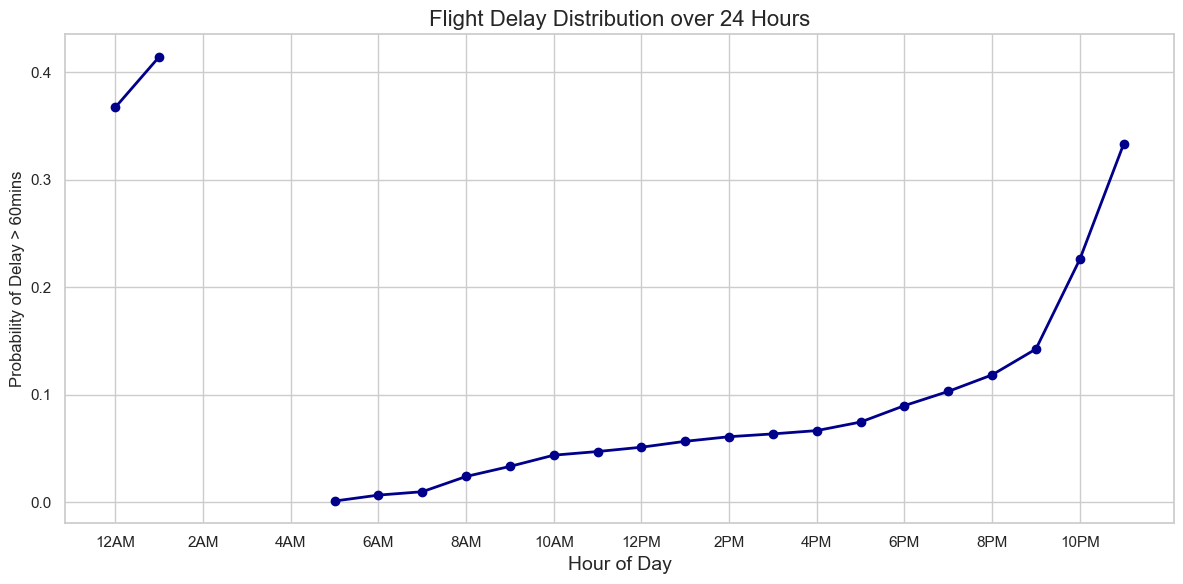

In [78]:
import numpy as np

# Assuming flights_data already has FL_DATE loaded as datetime
# Extract hour information from departure time
# Most aviation datasets store departure time as HHMM in an integer field
flights_data['HOUR'] = flights_data['DEP_TIME'] // 100  # Convert 1430 to 14 (2PM)

# For circular time calculation, we want hours 0-23
flights_data['HOUR'] = flights_data['HOUR'] % 24

# Calculate hour-by-hour delay probability
hourly_delay = (
    flights_data
    .assign(is_delayed=flights_data['DEP_DELAY'] >= 60)
    .groupby('HOUR')['is_delayed']
    .mean()
)

# Create a series with a full 24-hour cycle (to handle missing hours)
all_hours = pd.Series(index=range(24), data=np.nan)
hourly_delay = hourly_delay.combine_first(all_hours).sort_index()

# Apply rolling average with circular wrapping for time
# To handle the circular nature of time (after 23:00 comes 0:00)
wrapped_hours = pd.concat([hourly_delay.iloc[-3:], hourly_delay, hourly_delay.iloc[:3]])
wrapped_index = list(range(-3, 0)) + list(range(24)) + list(range(0, 3))
wrapped_hours.index = wrapped_index

# Calculate 3-hour rolling average
smoothed_delays = wrapped_hours.rolling(3, center=True).mean()

# Extract just the 0-23 hour portion
smoothed_delays = smoothed_delays.iloc[3:-3]

# Create the visualization
plt.figure(figsize=(12, 6))
plt.plot(smoothed_delays.index, smoothed_delays.values, 
         color='darkblue', linewidth=2, marker='o')

# Configure the chart
plt.title('Flight Delay Distribution over 24 Hours', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Probability of Delay > 60mins', fontsize=12)
plt.xticks(range(0, 24, 2), 
           ['12AM', '2AM', '4AM', '6AM', '8AM', '10AM', 
            '12PM', '2PM', '4PM', '6PM', '8PM', '10PM'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
#cities with most delays

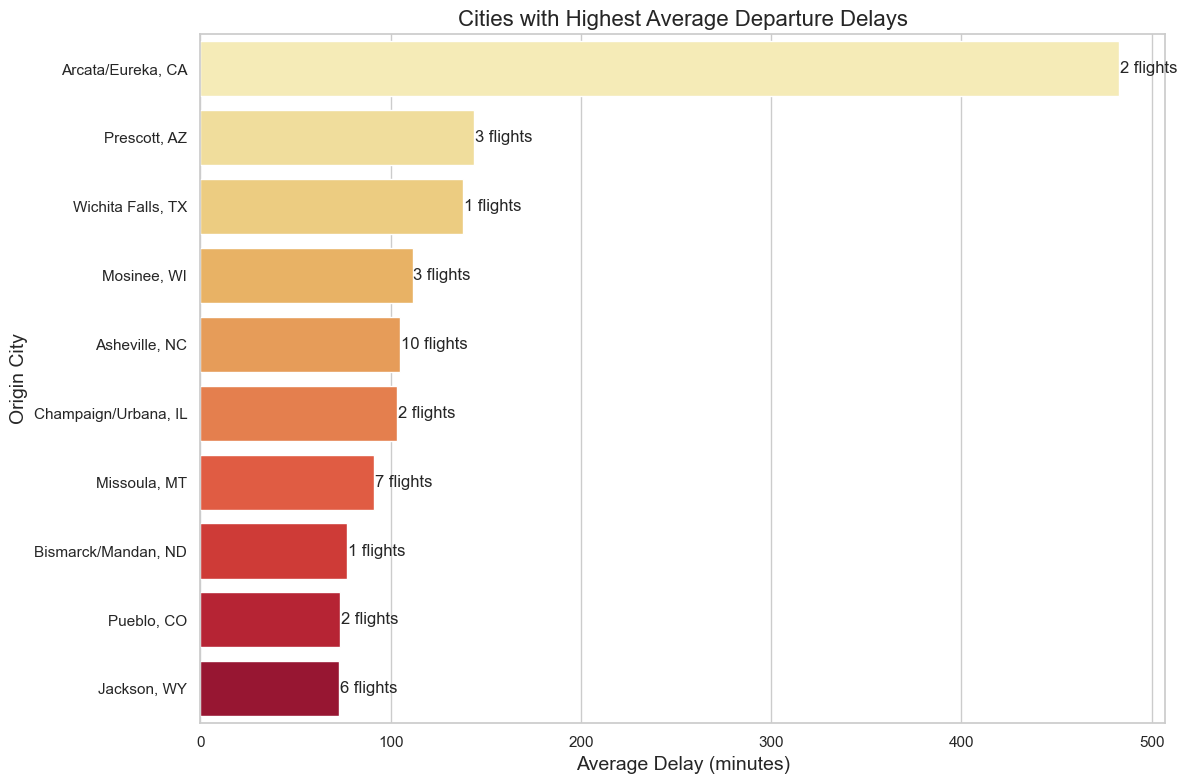

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")

# Calculate average delay by origin city
city_delays = (
    flights_data
    .groupby('ORIGIN_CITY')
    .agg({
        'DEP_DELAY': 'mean',
        'FL_DATE': 'count'  # Count flights per city
    })
    .rename(columns={'FL_DATE': 'FLIGHTS'})
    .reset_index()
)

# No minimum flight threshold applied
# Sort and get top 15 cities by average delay
top_delay_cities = city_delays.sort_values('DEP_DELAY', ascending=False).head(10)

# Create the visualization
plt.figure(figsize=(12, 8))

# Create bar chart
bars = sns.barplot(
    y='ORIGIN_CITY', 
    x='DEP_DELAY', 
    data=top_delay_cities,
    palette='YlOrRd'  # Color ramp from yellow to red
)

# Ensure grid is visible
plt.grid(True, axis='x')  # Explicit grid on x-axis

# Add flight count as text on each bar for context
for i, (delay, flights) in enumerate(zip(top_delay_cities['DEP_DELAY'], top_delay_cities['FLIGHTS'])):
    bars.text(delay + 0.5, i, f"{flights} flights", va='center')

plt.title('Cities with Highest Average Departure Delays', fontsize=16)
plt.xlabel('Average Delay (minutes)', fontsize=14)
plt.ylabel('Origin City', fontsize=14)
plt.tight_layout()
plt.show()


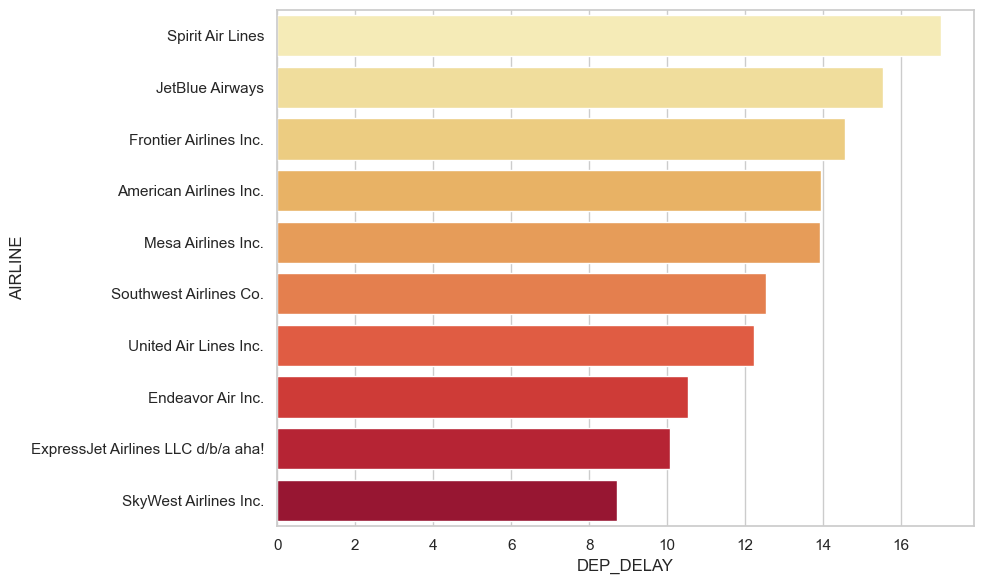

In [97]:
# Set visual style
sns.set_style("whitegrid")

airport_delays = (
    flights_data
    .groupby('AIRLINE')
    .agg({
        'DEP_DELAY' : 'mean',
        'FL_DATE' : 'count'
    })
    .reset_index()
)


top_airports_delay = airport_delays.sort_values('DEP_DELAY',ascending=False).head(10)

plt.figure(figsize = (10,6))
plt.grid(True)
sns.barplot(y = 'AIRLINE', x = 'DEP_DELAY', data = top_airports_delay, palette='YlOrRd')
plt.tight_layout()
plt.show()


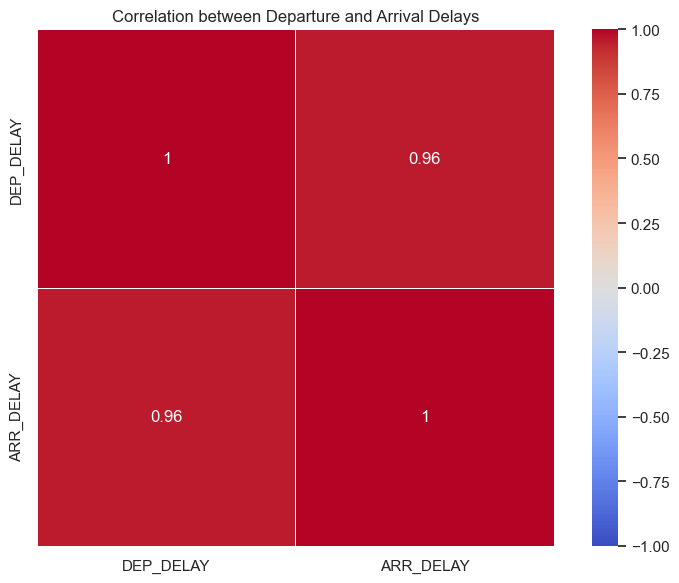

In [102]:
# Create a DataFrame with just the two columns of interest
delay_corr = flights_data[['DEP_DELAY', 'ARR_DELAY']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(delay_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            square=True, linewidths=0.5)
plt.title('Correlation between Departure and Arrival Delays')
plt.tight_layout()
plt.show()

# Machine Learning

In [113]:
# Identify categorical columns from the data
categorical_cols = ['AIRLINE', 'ORIGIN', 'ORIGIN_CITY', 
                   'DEST', 'DEST_CITY', 'CANCELLED']

# Create a copy of the DataFrame to avoid modifying the original
flights_encoded = flights_data.copy()

# Process each categorical column
for column in categorical_cols:
    # Skip if column is not in DataFrame
    if column not in flights_data.columns:
        print(f"Column '{column}' not found in the DataFrame. Skipping.")
        continue
        
    # Fill NaN values and convert to string
    flights_encoded[column] = flights_encoded[column].fillna('Missing').astype(str)
    
    # Count occurrences of each category
    value_counts = flights_encoded[column].value_counts()
    
    # Set the minimum count threshold - adjust this based on your dataset size
    min_count = 1000  # Higher threshold for flight data which likely has many records
    
    # Identify rare categories (those appearing less than min_count times)
    rare_categories = value_counts[value_counts < min_count].index.tolist()
    
    # Replace rare categories with 'Other'
    if rare_categories:
        # Create a mapping dictionary for faster replacement
        mapping = {cat: 'Other' for cat in rare_categories}
        
        # Apply the mapping using replace method
        flights_encoded[column] = flights_encoded[column].replace(mapping)
    
    # Print summary of changes
    print(f"Column '{column}': Replaced {len(rare_categories)} rare categories with 'Other'")

# Check the result
print("\nUnique values in encoded columns:")
for column in categorical_cols:
    if column in flights_data.columns:
        print(f"{column}: {flights_encoded[column].nunique()} (was {flights_data[column].nunique()} before encoding)")

# Additional columns that might benefit from binning rather than rare encoding
# For example, we could bin flight numbers, but they're typically not used as categories

Column 'AIRLINE': Replaced 14 rare categories with 'Other'
Column 'ORIGIN': Replaced 308 rare categories with 'Other'
Column 'ORIGIN_CITY': Replaced 303 rare categories with 'Other'
Column 'DEST': Replaced 305 rare categories with 'Other'
Column 'DEST_CITY': Replaced 300 rare categories with 'Other'
Column 'CANCELLED': Replaced 1 rare categories with 'Other'

Unique values in encoded columns:
AIRLINE: 5 (was 18 before encoding)
ORIGIN: 1 (was 308 before encoding)
ORIGIN_CITY: 1 (was 303 before encoding)
DEST: 1 (was 305 before encoding)
DEST_CITY: 1 (was 300 before encoding)
CANCELLED: 2 (was 2 before encoding)


In [114]:
import numpy as np # Set the target variable (what we want to predict)
label = 'CANCELLED'
df = flights_encoded
# Extract the target variable and features from the DataFrame
y = df[label].values.reshape(-1,)  # Target variable (salaries)
X = df.drop([label], axis=1)       # Features (everything else)

# Identify categorical columns in the feature set
cat_cols = X.select_dtypes(include=['object']).columns

# Get the indices of categorical columns in the feature set
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5, 
    random_state=0, 
    #stratify=df[['residence_location']]
)

# Print the shapes of the training and testing sets to verify the split
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

Training set shapes - X_train: (5000, 53), y_train: (5000,)
Testing set shapes - X_test: (5000, 53), y_test: (5000,)


Train accuracy: 1.0000
Test accuracy: 1.0000


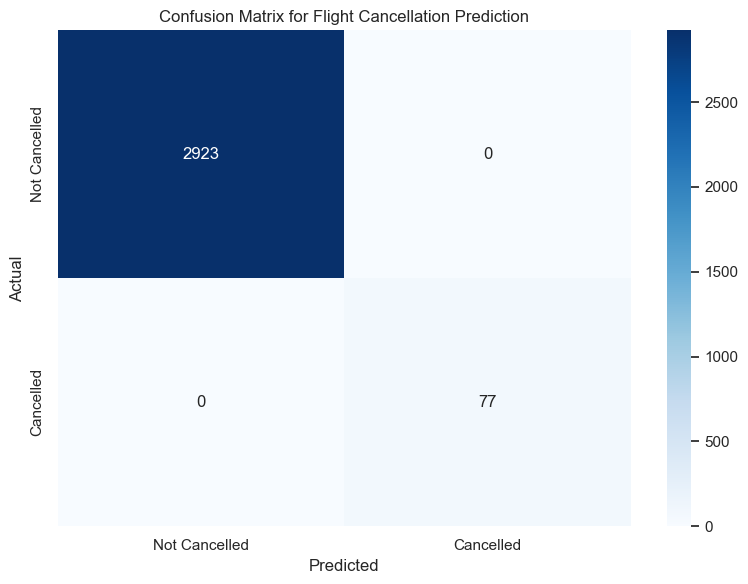

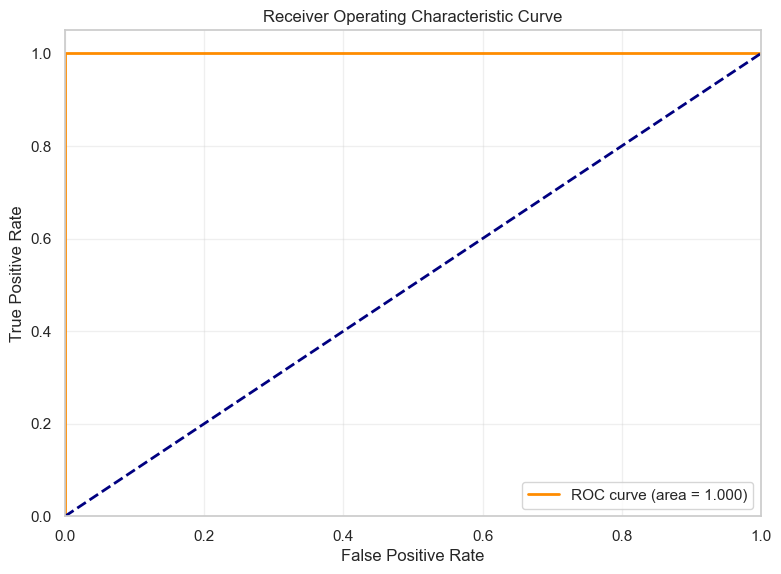


Classification Report:
               precision    recall  f1-score   support

Not Cancelled       1.00      1.00      1.00      2923
    Cancelled       1.00      1.00      1.00        77

     accuracy                           1.00      3000
    macro avg       1.00      1.00      1.00      3000
 weighted avg       1.00      1.00      1.00      3000



In [120]:
# Import necessary libraries
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set target label for cancellation
label = 'CANCELLED'  # This column contains 0.0 (not cancelled) and 1.0 (cancelled)

# Extract target and features - no need to convert to int since model can handle float values
y = flights_data[label]  # Keep as float
X = flights_data.drop([label], axis=1)

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Stratify to maintain class balance
)

# Create data pools with categorical features
train_pool = Pool(X_train, y_train, cat_features=cat_cols_idx)
test_pool = Pool(X_test, y_test, cat_features=cat_cols_idx)

# Initialize and configure classifier model
model = CatBoostClassifier(
    iterations=10000,
    depth=5,
    learning_rate=0.01,
    loss_function='Logloss',
    early_stopping_rounds=100,
    verbose=0
)

# Train model
model.fit(train_pool, eval_set=test_pool)

# Make predictions
y_train_pred_proba = model.predict_proba(train_pool)[:, 1]
y_test_pred_proba = model.predict_proba(test_pool)[:, 1]

# Convert probabilities to binary predictions
y_train_pred = (y_train_pred_proba > 0.5).astype(float)  # Keep as float to match original
y_test_pred = (y_test_pred_proba > 0.5).astype(float)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Flight Cancellation Prediction')
plt.tight_layout()
plt.show()

# Create and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Not Cancelled', 'Cancelled']))

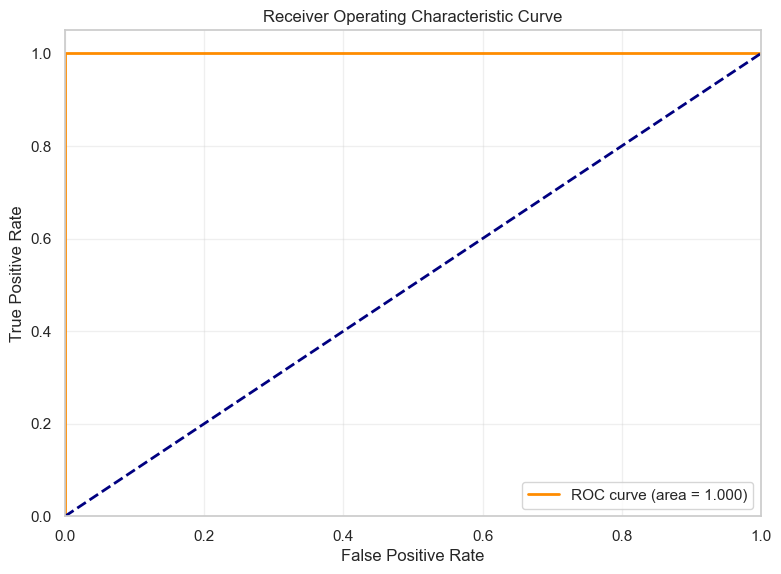

In [116]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


In [119]:
flights_data['CANCELLED']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    1.0
9997    0.0
9998    0.0
9999    0.0
Name: CANCELLED, Length: 10000, dtype: float64

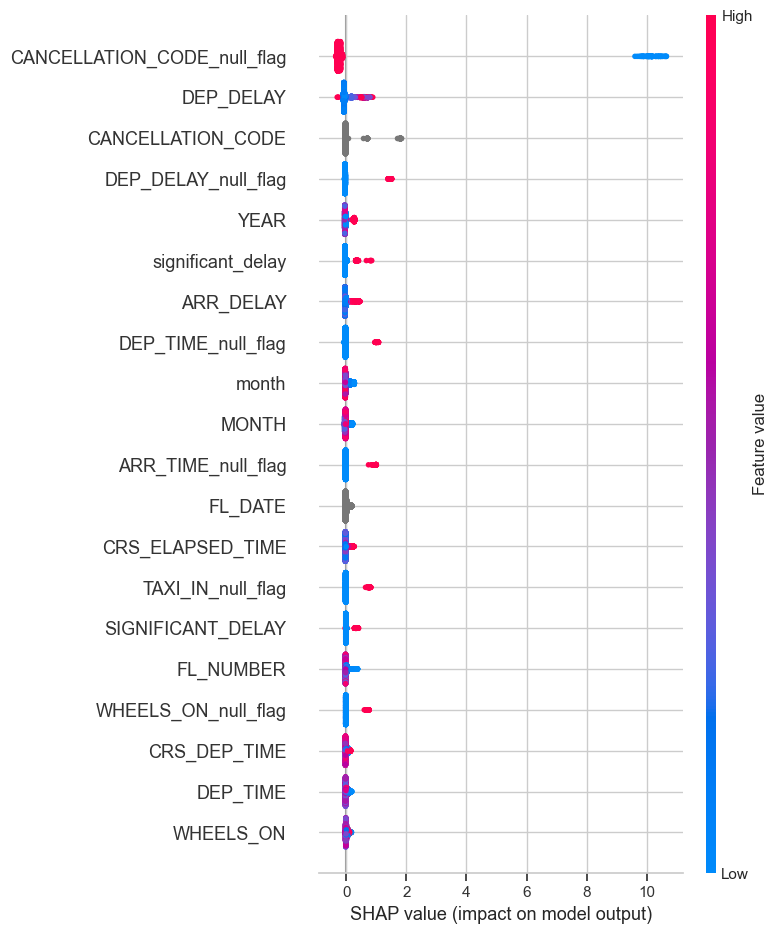

In [121]:
%matplotlib inline
# Initialize the SHAP JavaScript visualization library
shap.initjs()

# Create a SHAP TreeExplainer for the given 'model'
ex = shap.TreeExplainer(model)

# Compute SHAP values for the test dataset 'X_test' using the TreeExplainer
shap_values = ex.shap_values(X_test)

# Generate a summary plot of SHAP values to visualize feature contributions
shap.summary_plot(shap_values, X_test)